In [75]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [76]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [77]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/task_'+str(t)+'__'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)

In [78]:
err

array([[0.34733333, 0.3675    , 0.38066667, 0.395     , 0.3975    ,
        0.40233333, 0.40566667, 0.409     , 0.40866667, 0.40916667,
        0.41283333, 0.41033333, 0.412     , 0.41433333, 0.4175    ,
        0.4185    , 0.41683333, 0.41666667, 0.418     , 0.41983333,
        0.41916667, 0.41733333, 0.4195    , 0.42016667, 0.41933333,
        0.41616667, 0.4165    , 0.41816667, 0.41683333],
       [0.46266667, 0.49066667, 0.496     , 0.50083333, 0.5045    ,
        0.50516667, 0.5085    , 0.51016667, 0.51216667, 0.5125    ,
        0.51516667, 0.5135    , 0.51766667, 0.51516667, 0.51633333,
        0.51833333, 0.517     , 0.519     , 0.518     , 0.51866667,
        0.51983333, 0.52016667, 0.5185    , 0.51783333, 0.51933333,
        0.519     , 0.5195    , 0.51866667, 0.519     ],
       [0.39016667, 0.42466667, 0.4355    , 0.4445    , 0.4485    ,
        0.45016667, 0.45533333, 0.45933333, 0.46183333, 0.46383333,
        0.46333333, 0.4615    , 0.46266667, 0.4615    , 0.465     ,
  

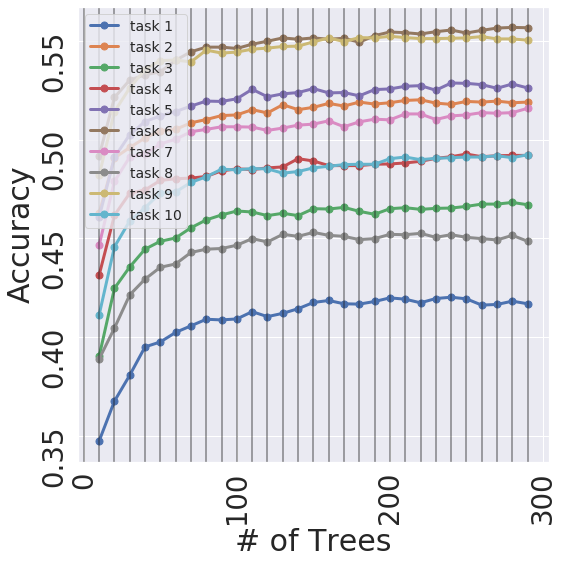

In [81]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks_.png',dpi=500)